In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import platform
import matplotlib

In [2]:
# 한글 깨짐 방지
# 원리는 색상 폰트들에서 한글을 인식하는 폰트로 바꾸어주는 구조
def font_kor_fixed() :
    from matplotlib import font_manager, rc
    import platform 

    if platform.system() == 'Windows': 
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    else: 
        print('Check your OS system')

In [3]:
#위의 것이 한글이 깨져서 새로 사용
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

In [4]:
#mokpo_data, tongyeong_data,gunsan_data 불러들이기
gunsan_frm    = pd.read_excel('gunsan_data.xlsx')
mokpo_frm     = pd.read_excel('mokpo_data.xlsx')
tongyeong_frm = pd.read_excel('tongyeong_data.xlsx')

## 1. 각 지역별 20년 1분기, 21년 1분기로 분리

In [5]:
#분리하기 좋게 Date를 인덱스로 변경
gunsan_frm.set_index("Date", inplace = True)
mokpo_frm.set_index("Date", inplace = True)
tongyeong_frm.set_index("Date", inplace = True)

## 1.1 군산 기준 날자별로 추출(20.1 ~ 20.3, 21.1 ~ 21.3)

In [6]:
#20년 1분기 추출
gs2001 = gunsan_frm.loc[202001]
gs2002 = gunsan_frm.loc[202002]
gs2003 = gunsan_frm.loc[202003]

In [7]:
#21년 1분기 추출
gs2101 = gunsan_frm.loc[202101]
gs2102 = gunsan_frm.loc[202102]
gs2103 = gunsan_frm.loc[202103]

## 1.1.1 20년 1분기, 21년 1분기별로 병합

In [8]:
gs20 = pd.concat([gs2001,gs2002,gs2003],axis = 0)

In [9]:
gs20

,Unnamed: 0,Si,Dong,Shop,cnt
Date,,,,,
202001,0,군산시,경장동,취미,70
202001,6,군산시,미룡동,골프장,40
202001,20,군산시,수송동,동물병원,160
202001,31,군산시,미장동,편의점,872
202001,34,군산시,선유도리,편의점,133
...,...,...,...,...,...
202003,3533,군산시,수송동,주유,728
202003,3534,군산시,서수리,편의점,198
202003,3542,군산시,대명동,음식점,360


In [10]:
gs21 = pd.concat([gs2101,gs2102,gs2103],axis = 0)

In [11]:
gs21

,Unnamed: 0,Si,Dong,Shop,cnt
Date,,,,,
202101,2,군산시,조촌동,서적,17
202101,3,군산시,문화동,마트/할인점,389
202101,4,군산시,경암동,차량관리,42
202101,13,군산시,개정동,음식점,67
202101,14,군산시,나운동,골프장,34
...,...,...,...,...,...
202103,3535,군산시,경장동,병원,15
202103,3536,군산시,미장동,음식점,1682
202103,3538,군산시,소룡동,취미,42


## 1.1.2 업종별 CNT값 합계(20,21년 각각)

In [12]:
gs20_cnt = gs20.groupby("Shop")['cnt'].sum()

In [13]:
gs20_cnt

Shop
가전           3602
건강보조        31787
골프장          1674
공과금           938
관람           1710
교육기타           71
교통           6798
동물병원         1629
마트/할인점     171717
문구사무용품       2130
병원          30128
보험             50
뷰티           5960
서적           1523
숙박           2343
스포츠시설        1554
스포츠의류용품      2503
아울렛         12835
유아교육          319
유흥           2730
음식점        142928
의류           2454
인테리어         6323
정기결제          208
제과점         21926
주생활관리        3361
주유          67944
주차            474
차량관리         6698
차량구매           80
취미           8565
커피/음료       23386
패션잡화         3065
편의점         83898
학교             62
학원           1101
화장품          5400
Name: cnt, dtype: int64

In [14]:
gs21_cnt = gs21.groupby("Shop")['cnt'].sum()

In [15]:
gs21_cnt

Shop
가전           6029
건강보조        24534
골프장          2006
공과금           531
관람            434
교육기타           55
교통           3749
동물병원         1676
마트/할인점     168860
문구사무용품       2616
병원          28459
보험             52
뷰티           5976
서적           1499
숙박           2700
스포츠시설        1048
스포츠의류용품      2337
아울렛         15929
유아교육          261
유흥           1182
음식점        129253
의류           2100
인테리어         8474
정기결제          129
제과점         20779
주생활관리        3353
주유          65675
주차            895
차량관리         7090
차량구매          285
취미           8492
커피/음료       26373
패션잡화         4847
편의점         87263
학교             61
학원           1120
화장품          5910
Name: cnt, dtype: int64

In [16]:
gs20_sum = gs20_cnt.to_frame()

In [17]:
gs20_sum

,cnt
Shop,
가전,3602
건강보조,31787
골프장,1674
공과금,938
관람,1710
교육기타,71
교통,6798
동물병원,1629
마트/할인점,171717


In [18]:
gs21_sum = gs21_cnt.to_frame()

In [19]:
gs21_sum

,cnt
Shop,
가전,6029
건강보조,24534
골프장,2006
공과금,531
관람,434
교육기타,55
교통,3749
동물병원,1676
마트/할인점,168860


## 1.2 목포 기준 날자별로 추출(20.1 ~ 20.3, 21.1 ~ 21.3)

In [20]:
#20년 1분기 추출
mp2001 = mokpo_frm.loc[202001]
mp2002 = mokpo_frm.loc[202002]
mp2003 = mokpo_frm.loc[202003]

In [21]:
#21년 1분기 추출
mp2101 = mokpo_frm.loc[202101]
mp2102 = mokpo_frm.loc[202102]
mp2103 = mokpo_frm.loc[202103]

## 1.2.1 20년 1분기, 21년 1분기별로 병합

In [22]:
mp20 = pd.concat([mp2001,mp2002,mp2003],axis = 0)

In [23]:
mp20

,Unnamed: 0,Si,Dong,Shop,cnt
Date,,,,,
202001,3,목포시,상동,보험,19
202001,5,목포시,항동,병원,12
202001,8,목포시,죽교동,음식점,1074
202001,11,목포시,창평동,병원,21
202001,20,목포시,옥암동,주생활관리,163
...,...,...,...,...,...
202003,2070,목포시,상락동1가,음식점,100
202003,2071,목포시,측후동,음식점,20
202003,2077,목포시,호남동,병원,269


In [24]:
mp21 = pd.concat([mp2101,mp2102,mp2103],axis = 0)

In [25]:
mp21

,Unnamed: 0,Si,Dong,Shop,cnt
Date,,,,,
202101,7,목포시,호남동,주차,244
202101,16,목포시,용당동,패션잡화,49
202101,18,목포시,연산동,취미,193
202101,29,목포시,용해동,건강보조,564
202101,33,목포시,산정동,건강보조,1385
...,...,...,...,...,...
202103,2051,목포시,석현동,건강보조,447
202103,2052,목포시,죽교동,인테리어,34
202103,2069,목포시,대양동,마트/할인점,554


## 1.2.2 업종별 CNT값 합계(20,21년 각각)

In [26]:
mp20_cnt = mp20.groupby("Shop")['cnt'].sum()

In [27]:
mp20_cnt

Shop
가례             35
가전           3394
건강보조        33635
골프장           792
공과금           131
관람           1093
교육기타          131
교통             70
대중교통          133
동물병원         1799
마트/할인점     171397
문구사무용품       2432
병원          36892
보험             56
뷰티           5927
서적           1754
숙박           3677
스포츠시설        1630
스포츠의류용품      4163
여행상품           10
온라인쇼핑        1155
유아교육          131
유흥           4657
음식점        126781
의류           3721
인테리어         7021
제과점         17965
주생활관리        1955
주유          37880
주차           1369
차량관리         4659
차량구매           55
취미           8664
커피/음료       27299
패션잡화         2128
편의점         66161
학원           1943
화장품          4932
Name: cnt, dtype: int64

In [28]:
mp21_cnt = mp21.groupby("Shop")['cnt'].sum()

In [29]:
mp21_cnt

Shop
가례             83
가전           3465
건강보조        27559
골프장          1245
공과금            75
관람            282
교육기타           89
교통             47
놀이공원           53
대중교통          135
동물병원         1994
마트/할인점     172157
문구사무용품       3097
병원          34923
보험             63
뷰티           6044
서적           1839
숙박           3186
스포츠시설         844
스포츠의류용품      4085
온라인쇼핑         552
유아교육           85
유흥           1831
음식점        112919
의류           3746
인테리어         7336
제과점         17202
주생활관리        2033
주유          37252
주차           1211
차량관리         5197
차량구매           52
취미           7397
커피/음료       29236
패션잡화         1990
편의점         75355
학원           2354
화장품          3937
Name: cnt, dtype: int64

In [30]:
mp20_sum = mp20_cnt.to_frame()

In [31]:
mp20_sum

,cnt
Shop,
가례,35
가전,3394
건강보조,33635
골프장,792
공과금,131
관람,1093
교육기타,131
교통,70
대중교통,133


In [32]:
mp21_sum = mp21_cnt.to_frame()

In [33]:
mp21_sum

,cnt
Shop,
가례,83
가전,3465
건강보조,27559
골프장,1245
공과금,75
관람,282
교육기타,89
교통,47
놀이공원,53


## 1.3 군산 기준 날자별로 추출(20.1 ~ 20.3, 21.1 ~ 21.3)

In [34]:
#20년 1분기 추출
ty2001 = tongyeong_frm.loc[202001]
ty2002 = tongyeong_frm.loc[202002]
ty2003 = tongyeong_frm.loc[202003]

In [35]:
#21년 1분기 추출
ty2101 = tongyeong_frm.loc[202101]
ty2102 = tongyeong_frm.loc[202102]
ty2103 = tongyeong_frm.loc[202103]

## 1.3.1 20년 1분기, 21년 1분기별로 병합

In [36]:
ty20 = pd.concat([ty2001,ty2002,ty2003],axis = 0)

In [37]:
ty20

,Unnamed: 0,Si,Dong,Shop,cnt
Date,,,,,
202001,1,통영시,삼화리,마트/할인점,118
202001,6,통영시,중앙동,병원,292
202001,9,통영시,북신동,차량관리,55
202001,10,통영시,원평리,차량관리,11
202001,11,통영시,항남동,유흥,124
...,...,...,...,...,...
202003,2013,통영시,문화동,주유,341
202003,2026,통영시,죽림리,패션잡화,49
202003,2029,통영시,도천동,주생활관리,47


In [38]:
ty21 = pd.concat([ty2101,ty2102,ty2103],axis = 0)

In [39]:
ty21

,Unnamed: 0,Si,Dong,Shop,cnt
Date,,,,,
202101,27,통영시,도남동,마트/할인점,465
202101,29,통영시,북신동,화장품,102
202101,34,통영시,서호동,건강보조,98
202101,38,통영시,원평리,음식점,64
202101,42,통영시,중앙동,음식점,1441
...,...,...,...,...,...
202103,2017,통영시,서호동,건강보조,99
202103,2022,통영시,무전동,의류,131
202103,2024,통영시,당동,음식점,15


## 1.3.2 업종별 CNT값 합계(20,21년 각각)

In [40]:
ty20_cnt = ty20.groupby("Shop")['cnt'].sum()

In [41]:
ty20_cnt

Shop
가례            62
가전          1566
건강보조       15066
골프장          377
공과금           23
관람           745
교육기타         102
놀이공원         350
동물병원         932
마트/할인점     76741
문구사무용품       796
병원         16282
보험            72
뷰티          3251
서적           695
숙박          3982
스포츠시설        547
스포츠의류용품     1387
유아교육         318
유흥          2725
음식점        78339
의류          1852
인테리어        2916
제과점         7509
주생활관리       2317
주유         27132
주차            68
차량관리        2088
취미          6646
커피/음료      11636
패션잡화        7472
편의점        54724
학원           779
화장품         2024
Name: cnt, dtype: int64

In [42]:
ty21_cnt = ty21.groupby("Shop")['cnt'].sum()

In [43]:
ty21_cnt

Shop
가례            47
가전          1762
건강보조       12780
골프장          464
공과금           59
관람           175
교육기타         134
교통           119
놀이공원         423
동물병원        1561
마트/할인점     78790
문구사무용품       923
병원         15199
보험            60
뷰티          3345
서적          1020
숙박          3659
스포츠시설        465
스포츠의류용품     1515
유아교육         239
유흥          1234
음식점        78164
의류          1821
인테리어        3480
제과점         7976
주생활관리       2741
주유         26528
주차           653
차량관리        2000
취미          6668
커피/음료      14105
패션잡화        7514
편의점        58253
학원           958
화장품         1659
Name: cnt, dtype: int64

In [44]:
ty20_sum = ty20_cnt.to_frame()

In [45]:
ty20_sum

,cnt
Shop,
가례,62
가전,1566
건강보조,15066
골프장,377
공과금,23
관람,745
교육기타,102
놀이공원,350
동물병원,932


In [46]:
ty21_sum = ty21_cnt.to_frame()

In [47]:
ty21_sum

,cnt
Shop,
가례,47
가전,1762
건강보조,12780
골프장,464
공과금,59
관람,175
교육기타,134
교통,119
놀이공원,423


### 지역별 2020, 2021년 Shop기준 CNT값 합계

gs20_sum  
gs21_sum  

mp20_sum  
mp21_sum  

ty20_sum  
ty21_sum  


#### 지역별 Shop 갯수 확인

In [48]:
print(len(gs20_sum))
print(len(gs21_sum))

37
37


In [49]:
print(len(mp20_sum))
print(len(mp21_sum))

38
38


In [50]:
print(len(ty20_sum))
print(len(ty21_sum))

34
35


### 세 도시를 연도별로 합치기
### 그 후, 각각 컬럼명을 도시 명으로 변경

In [51]:
#20년 3도시 데이터프레임 합치기
city20 = pd.concat([gs20_sum,mp20_sum,ty20_sum],axis=1)

In [52]:
city20

,cnt,cnt,cnt
Shop,,,
가전,3602.0,3394.0,1566.0
건강보조,31787.0,33635.0,15066.0
골프장,1674.0,792.0,377.0
공과금,938.0,131.0,23.0
관람,1710.0,1093.0,745.0
교육기타,71.0,131.0,102.0
교통,6798.0,70.0,NaN
동물병원,1629.0,1799.0,932.0
마트/할인점,171717.0,171397.0,76741.0


In [53]:
#컬럼명 도시명으로 수정
city20.columns =['군산','목포','통영']

In [54]:
city20

,군산,목포,통영
Shop,,,
가전,3602.0,3394.0,1566.0
건강보조,31787.0,33635.0,15066.0
골프장,1674.0,792.0,377.0
공과금,938.0,131.0,23.0
관람,1710.0,1093.0,745.0
교육기타,71.0,131.0,102.0
교통,6798.0,70.0,NaN
동물병원,1629.0,1799.0,932.0
마트/할인점,171717.0,171397.0,76741.0


In [55]:
#21년 3도시 데이터프레임 합치기
city21 = pd.concat([gs21_sum,mp21_sum,ty21_sum],axis=1)

In [56]:
city21

,cnt,cnt,cnt
Shop,,,
가전,6029.0,3465.0,1762.0
건강보조,24534.0,27559.0,12780.0
골프장,2006.0,1245.0,464.0
공과금,531.0,75.0,59.0
관람,434.0,282.0,175.0
교육기타,55.0,89.0,134.0
교통,3749.0,47.0,119.0
동물병원,1676.0,1994.0,1561.0
마트/할인점,168860.0,172157.0,78790.0


In [57]:
#컬럼명 도시명으로 수정
city21.columns =['군산','목포','통영']

In [58]:
city21

,군산,목포,통영
Shop,,,
가전,6029.0,3465.0,1762.0
건강보조,24534.0,27559.0,12780.0
골프장,2006.0,1245.0,464.0
공과금,531.0,75.0,59.0
관람,434.0,282.0,175.0
교육기타,55.0,89.0,134.0
교통,3749.0,47.0,119.0
동물병원,1676.0,1994.0,1561.0
마트/할인점,168860.0,172157.0,78790.0


#### Shop을 컬럼으로 욺김

In [59]:
city20 = city20.reset_index()

In [60]:
city21 = city21.reset_index()

## 시각화

### 20년 시각화

In [61]:
#행의 갯수
N =city20.shape[0]

In [62]:
#행의 갯수 리스트로
index = np.arange(N)

In [63]:
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

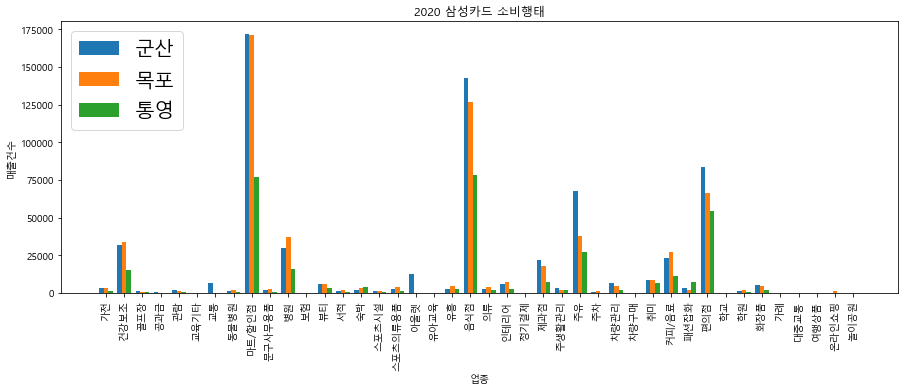

In [73]:
#그래프 크기 조절
plt.figure(figsize =(15,5))

#타이틀, x축, y축 이름달기
plt.title('2020 삼성카드 소비행태', color='black')
plt.xlabel('업종')
plt.ylabel('매출건수')

#그래프 막대 위치, 내용, 굵기 설정
w = 0.25
plt.bar(index - w, city20['군산'], width = w)
plt.bar(index,     city20['목포'], width = w)
plt.bar(index + w, city20['통영'], width = w)

#x축값 이름 shop으로 설정, 글 회전
plt.xticks(index, city20['Shop'], rotation = 90)

#범례
plt.legend(['군산','목포','통영'], fontsize = 20)

plt.savefig('samsung2020.png')

### 21년 시각화

In [65]:
#행의 갯수
N2 =city21.shape[0]

In [66]:
#행의 갯수 리스트로
index2 = np.arange(N2)

In [67]:
index2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

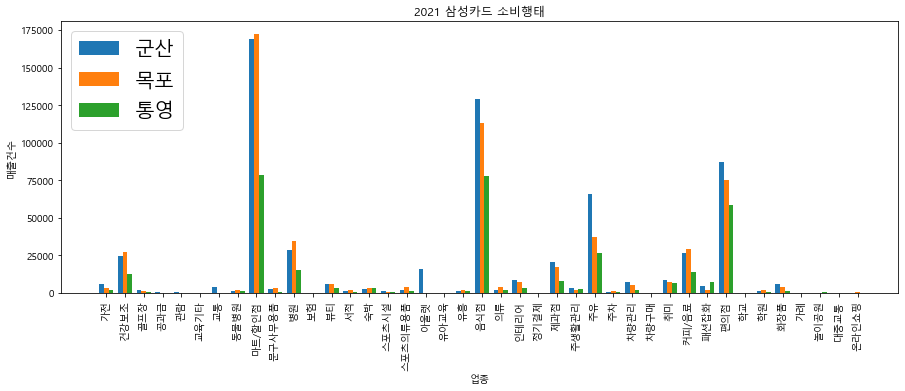

In [72]:
#그래프 크기 조절
plt.figure(figsize =(15,5))

##타이틀, x축, y축 이름달기
plt.title('2021 삼성카드 소비행태', color='black')
plt.xlabel('업종')
plt.ylabel('매출건수')

#그래프 막대 위치, 내용, 굵기 설정
w = 0.25
plt.bar(index2 - w, city21['군산'], width = w)
plt.bar(index2,     city21['목포'], width = w)
plt.bar(index2 + w, city21['통영'], width = w)

#x축값 이름 shop으로 설정, 글 회전
plt.xticks(index2, city21['Shop'], rotation = 90)

#범례
plt.legend(['군산','목포','통영'], fontsize = 20)

plt.savefig('samsung2021.png')